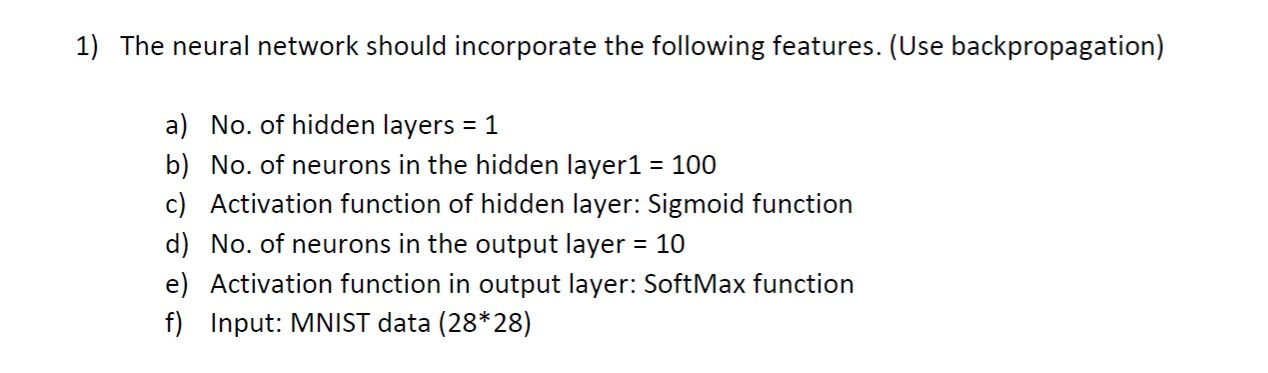

**Imports**

In [45]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time

**Device Configuration**

In [46]:
device = 'cpu'

**Hyperparameters**

In [47]:
input_size = 784 # 28x28 images
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100

**MNIST Dataset**

In [48]:
train_data = torchvision.datasets.MNIST(root='/content/sample_data', train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='/content/sample_data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

**Checking the dataset**

In [49]:
print(train_data.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


**Neural Network**

In [50]:
test_error = []

In [51]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size, num_classes) 

  def forward(self, x):
    out = self.l1(x)
    out = self.sigmoid(out)
    out = self.l2(out)
    return out

In [52]:
def train_and_plot(model, learning_rate):
    start = time.time()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    loss_arr = []

    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
        # resizing the tensors
        images = images.reshape(-1, 28*28)
        labels = labels

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_arr.append(loss.item())

    end = time.time()
    print(f"Training time: {end - start} s")
    plt.plot(loss_arr)
    plt.xlabel("epochs")
    plt.ylabel("loss in learning rate " + str(learning_rate))
    plt.title("Epoch vs Loss Curve")


In [53]:
def train_test_acc(model):
  with torch.no_grad(): # to stop tracking we will use torch.no_grad()
    n_correct = 0
    n_samples = 0
    for images, labels in train_loader:
      images = images.reshape(-1, 28*28)
      outputs = model(images)

      _, predictions = torch.max(outputs, 1)
      n_samples += labels.shape[0]
      n_correct += (predictions==labels).sum().item()

  acc = 100*(n_correct/n_samples)
  test_error.append(100 - acc)
  print("Accuracy on train data is :", acc)

  with torch.no_grad(): # to stop tracking we will use torch.no_grad()
      n_correct = 0
      n_samples = 0
      for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()

  acc = 100*(n_correct/n_samples)
  print("Accuracy on test data is :", acc)

In [54]:
def losscalculation(model, learning_rate):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  n_total_steps = len(train_loader)
  for i, (images, labels) in enumerate(train_loader):
      # resizing the tensors
      images = images.reshape(-1, 28*28)
      labels = labels

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  print("Loss on train data is :", loss.item())

  n_total_steps = len(test_loader)
  for i, (images, labels) in enumerate(test_loader):
      # resizing the tensors
      images = images.reshape(-1, 28*28)
      labels = labels

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  print("Loss on test data is :", loss.item()) 

**For Learning rate 0.025**

Training time: 44.18182325363159 s
Loss on train data is : 0.41121265292167664
Loss on test data is : 0.48171135783195496
Accuracy on train data is : 90.23166666666667
Accuracy on test data is : 90.85


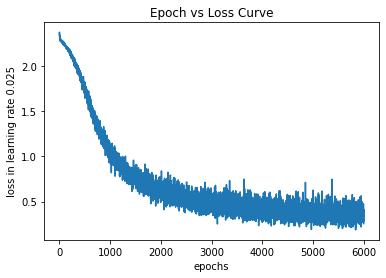

In [55]:
model1 = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
train_and_plot(model1, 0.025)
losscalculation(model1, 0.025)
train_test_acc(model1)

**For Learning rate 0.05**

Training time: 44.36819076538086 s
Loss on train data is : 0.24577054381370544
Loss on test data is : 0.4058452248573303
Accuracy on train data is : 91.79333333333334
Accuracy on test data is : 92.22


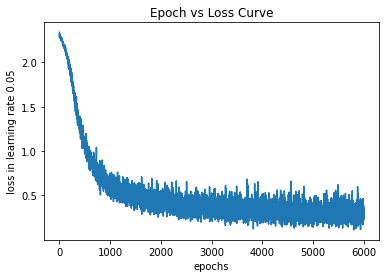

In [56]:
model2 = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
train_and_plot(model2, 0.05)
losscalculation(model2, 0.05)
train_test_acc(model2)

**For Learning rate 0.1**

Training time: 43.91934037208557 s
Loss on train data is : 0.23706667125225067
Loss on test data is : 0.33575886487960815
Accuracy on train data is : 93.56666666666666
Accuracy on test data is : 93.74


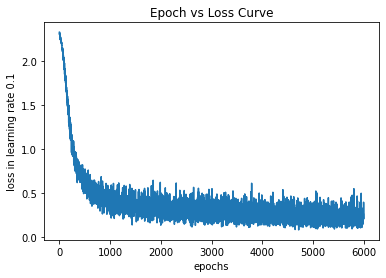

In [57]:
model3 = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
train_and_plot(model3, 0.1)
losscalculation(model3, 0.1)
train_test_acc(model3)

**For Learning rate 0.2**

Training time: 44.05024433135986 s
Loss on train data is : 0.06206105276942253
Loss on test data is : 0.250950425863266
Accuracy on train data is : 95.46333333333334
Accuracy on test data is : 95.43


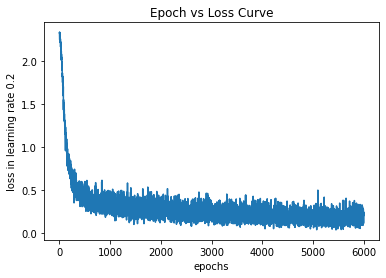

In [58]:
model4 = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
train_and_plot(model4, 0.2)
losscalculation(model4, 0.2)
train_test_acc(model4)

**For Learning rate 0.5**

Training time: 44.05341148376465 s
Loss on train data is : 0.043149471282958984
Loss on test data is : 0.1176442876458168
Accuracy on train data is : 97.50166666666667
Accuracy on test data is : 97.35000000000001


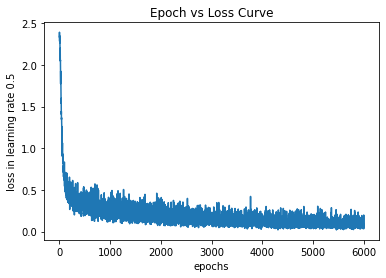

In [59]:
model5 = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
train_and_plot(model5, 0.5)
losscalculation(model5, 0.5)
train_test_acc(model5)

**Test error vs Learning rate Curve**

Text(0.5, 1.0, 'Test Error vs Learning Rate Curve')

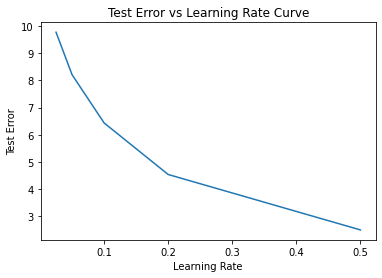

In [60]:
plt.plot([0.025, 0.05, 0.1, 0.2, 0.5], test_error)
plt.xlabel("Learning Rate")
plt.ylabel("Test Error")
plt.title("Test Error vs Learning Rate Curve")

**Answer to the Question 6 b**

I will prefer the learning rate to be 0.5 as the test error is minimum as shown in the above digram, also since the learning rate is high convergence will be faster which is also clear form the loss vs epoch plot for the learning rate of 0.5 i.e. the model has converged to the minima very quickly as compared to other smaller learning rates.

**Case of Varying Learning rate**

In [61]:
model6 = NeuralNetwork(input_size, hidden_size, num_classes).to(device)
initial_learning_rate = 0.8
criterion = nn.CrossEntropyLoss()

Training time: 43.706294298172 s


Text(0.5, 1.0, 'Epoch vs Loss Curve')

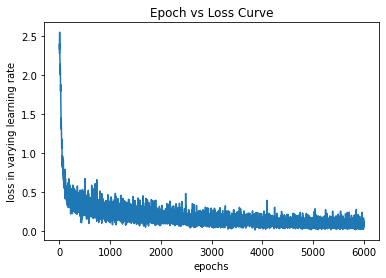

In [62]:
loss_arr = []
start = time.time()
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    learning_rate = initial_learning_rate/1.5
    optimizer = torch.optim.SGD(model6.parameters(), lr=learning_rate)
    for i, (images, labels) in enumerate(train_loader):
        # resizing the tensors
        images = images.reshape(-1, 28*28)
        labels = labels

        # forward pass
        outputs = model6(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_arr.append(loss.item())

end = time.time()
print(f"Training time: {end - start} s")
plt.plot(loss_arr)
plt.xlabel("epochs")
plt.ylabel("loss in varying learning rate")
plt.title("Epoch vs Loss Curve")

In [63]:
train_test_acc(model6)

Accuracy on train data is : 97.76666666666667
Accuracy on test data is : 96.95


**Answer to the Question 6 C**

1. The rate of convergence is faster in the beginning but it gradually slows down as we move towards the mimima.

2. Use of varying learning rate has slightly increased the time of execution also. 

3. Here the accuracy is very high. 

4. Lowering the learning rate also avoid gradient overshooting.